# Load the Required Libraries

In [19]:
options(jupyter.plot_mimetypes = 'image/png')

In [12]:
library(MASS)

In [13]:
# install.packages('ISLR', repos='http://cran.us.r-project.org')

In [14]:
library(ISLR)

# Simple Linear Regression

In [30]:
names(Boston)
# lstat - percentage of the population in that region that's of the lower status

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

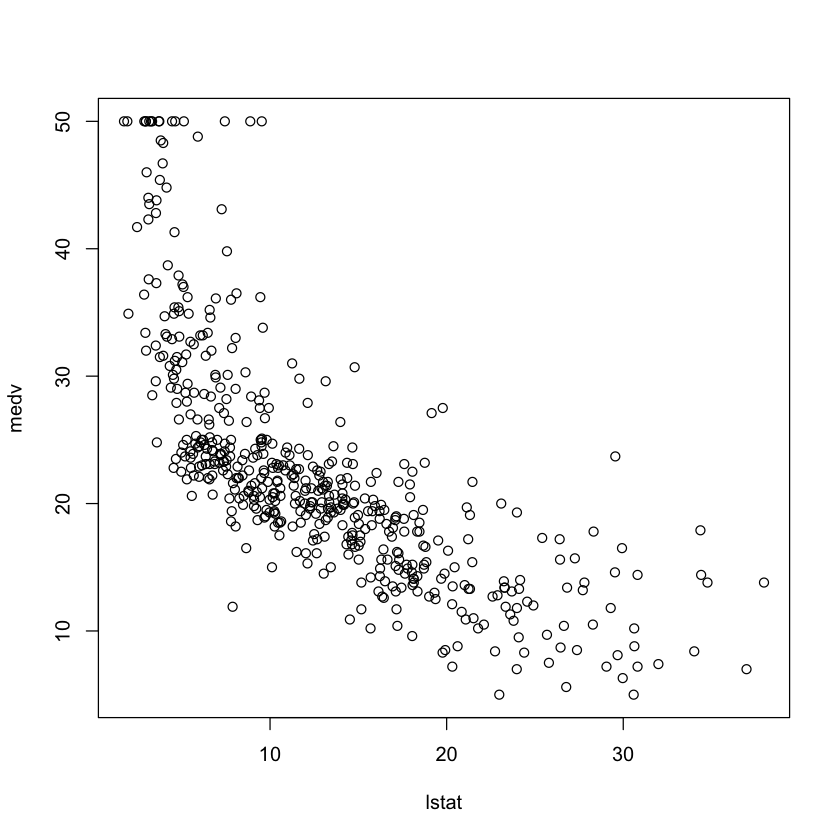

In [31]:
# plot medv as the response and lstat as the predictor
plot(medv~lstat, Boston)

In [32]:
# fit a linear model
# ~ means "is modeled as"
fit1 = lm(medv~lstat, data=Boston)
fit1


Call:
lm(formula = medv ~ lstat, data = Boston)

Coefficients:
(Intercept)        lstat  
      34.55        -0.95  


In [33]:
# For more details on the fit
summary(fit1)


Call:
lm(formula = medv ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


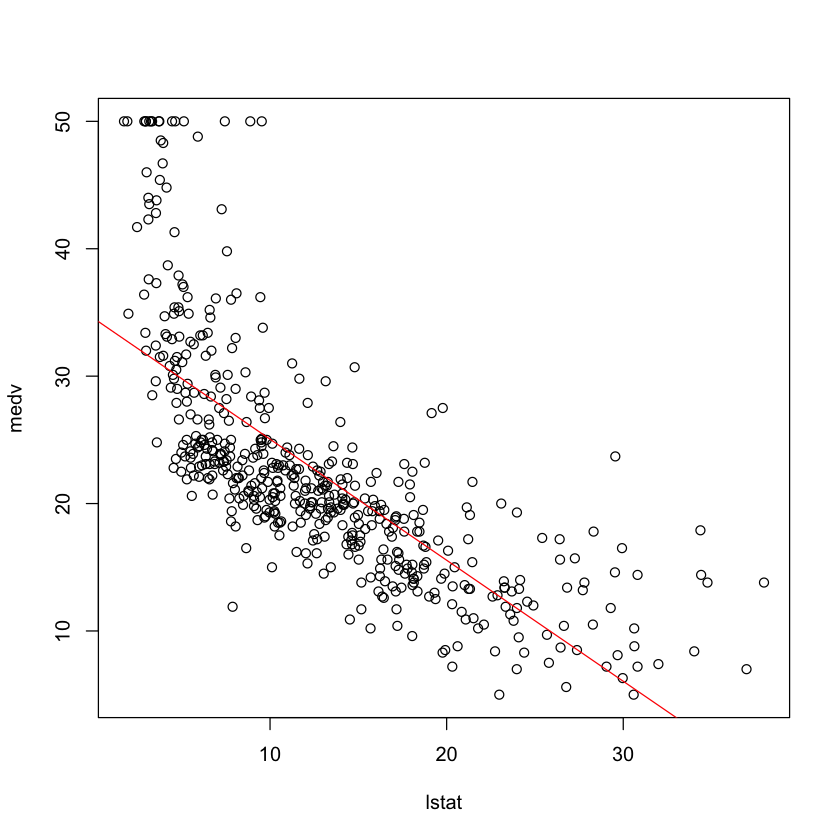

In [37]:
# Use abline to draw the line on the plot
plot(medv~lstat, Boston)
abline(fit1, col='red')

In [42]:
# Other components of the fit
names(fit1)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [54]:
# Confidence Interval for the fit
confint(fit1)

,2.5 %,97.5 %
(Intercept),33.44846,35.65922
lstat,-1.0261482,-0.8739505


In [55]:
# Predict the value of the response for a new value of the predictor
predict(fit1, data.frame(lstat=c(5, 10, 15)), interval='confidence')

,fit,lwr,upr
1,29.80359,29.00741,30.59978
2,25.05335,24.47413,25.63256
3,20.30310,19.73159,20.87461


# Multiple Linear Regression

In [62]:
fit2 = lm(medv~lstat+age, data=Boston)

In [63]:
summary(fit2)


Call:
lm(formula = medv ~ lstat + age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.981  -3.978  -1.283   1.968  23.158 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.22276    0.73085  45.458  < 2e-16 ***
lstat       -1.03207    0.04819 -21.416  < 2e-16 ***
age          0.03454    0.01223   2.826  0.00491 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.173 on 503 degrees of freedom
Multiple R-squared:  0.5513,	Adjusted R-squared:  0.5495 
F-statistic:   309 on 2 and 503 DF,  p-value: < 2.2e-16


In [65]:
# Use all other variables apart from medv as predictors ~.
fit3 = lm(medv~., Boston)

In [66]:
summary(fit3)


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0

- Age when used in the model with all other predictors is not significant
- When used in the model alongside just lstat, it was significant
- What this means is that there are a number of predictors that are very correlated with age and in the presence of them, age is no longer required

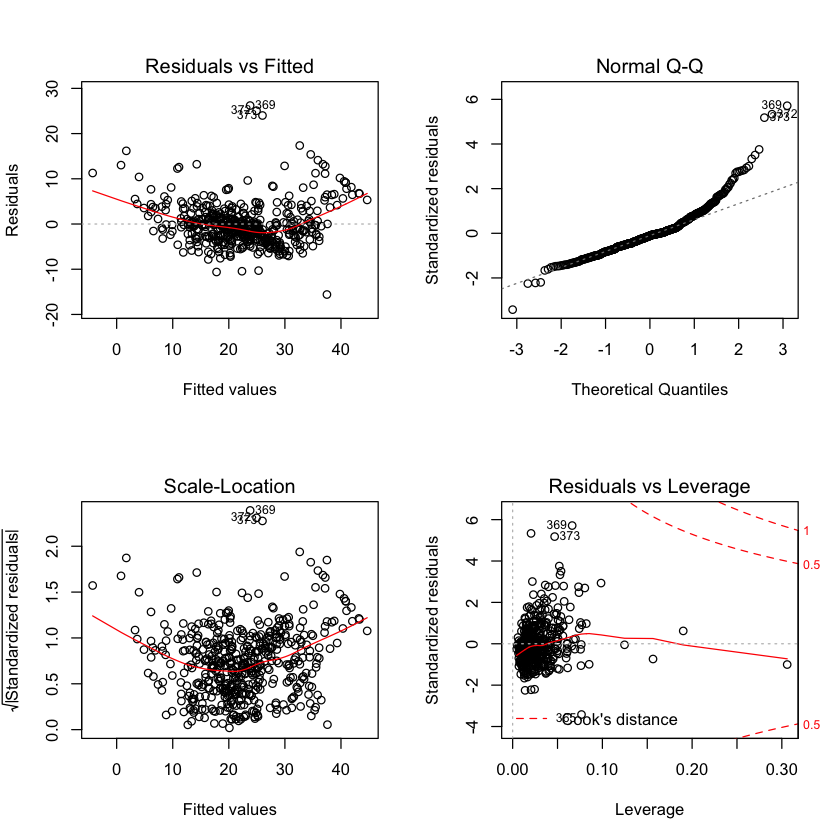

In [68]:
# Plotting the linear model
par(mfrow=c(2, 2))
plot(fit3)

# 1. Residual vs. fitted values - we look for non-linearities. A curve in the residuls indicates that the model is not
# quite capturing everything that's going on
# 2. Scale Location: Plots this to see if the variance is changing with the mean or the fit


In [72]:
# update a model to remove/add predictors
# Nothing on the left means we're going to use the same response
# . means whatever the model was in fit3
# -age -indus means we want to remove the predictors age and indus from the model
fit4 = update(fit3, ~.-age-indus)
summary(fit4)


Call:
lm(formula = medv ~ crim + zn + chas + nox + rm + dis + rad + 
    tax + ptratio + black + lstat, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.5984  -2.7386  -0.5046   1.7273  26.2373 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.341145   5.067492   7.171 2.73e-12 ***
crim         -0.108413   0.032779  -3.307 0.001010 ** 
zn            0.045845   0.013523   3.390 0.000754 ***
chas          2.718716   0.854240   3.183 0.001551 ** 
nox         -17.376023   3.535243  -4.915 1.21e-06 ***
rm            3.801579   0.406316   9.356  < 2e-16 ***
dis          -1.492711   0.185731  -8.037 6.84e-15 ***
rad           0.299608   0.063402   4.726 3.00e-06 ***
tax          -0.011778   0.003372  -3.493 0.000521 ***
ptratio      -0.946525   0.129066  -7.334 9.24e-13 ***
black         0.009291   0.002674   3.475 0.000557 ***
lstat        -0.522553   0.047424 -11.019  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*

# Interactions

In [77]:
# To create a model with the main effects for two predictors, as well as the interaction between the two predictors
# use '*'
# The pure interaction is indicated by a colon
fit5 = lm(medv~lstat*age, Boston)
#fit5 = lm(medv~lstat:age, Boston) # This model has only the interaction - not recommended
summary(fit5)
# The main effect for age is not significant, but the interaction is somewhat significant


Call:
lm(formula = medv ~ lstat * age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.806  -4.045  -1.333   2.085  27.552 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36.0885359  1.4698355  24.553  < 2e-16 ***
lstat       -1.3921168  0.1674555  -8.313 8.78e-16 ***
age         -0.0007209  0.0198792  -0.036   0.9711    
lstat:age    0.0041560  0.0018518   2.244   0.0252 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.149 on 502 degrees of freedom
Multiple R-squared:  0.5557,	Adjusted R-squared:  0.5531 
F-statistic: 209.3 on 3 and 502 DF,  p-value: < 2.2e-16


# Non Linearities

In [82]:
# To account for the non-linearity, we add a quadratic term to the equation
# Power has a special meaning in this language. So to actually make it mean lstat raised to 2, we protect it with the
# identity function I
# Can have multiple statements separated by a semicolon
fit6 = lm(medv~lstat+I(lstat^2), Boston); summary(fit6)


Call:
lm(formula = medv ~ lstat + I(lstat^2), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2834  -3.8313  -0.5295   2.3095  25.4148 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.862007   0.872084   49.15   <2e-16 ***
lstat       -2.332821   0.123803  -18.84   <2e-16 ***
I(lstat^2)   0.043547   0.003745   11.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.524 on 503 degrees of freedom
Multiple R-squared:  0.6407,	Adjusted R-squared:  0.6393 
F-statistic: 448.5 on 2 and 503 DF,  p-value: < 2.2e-16


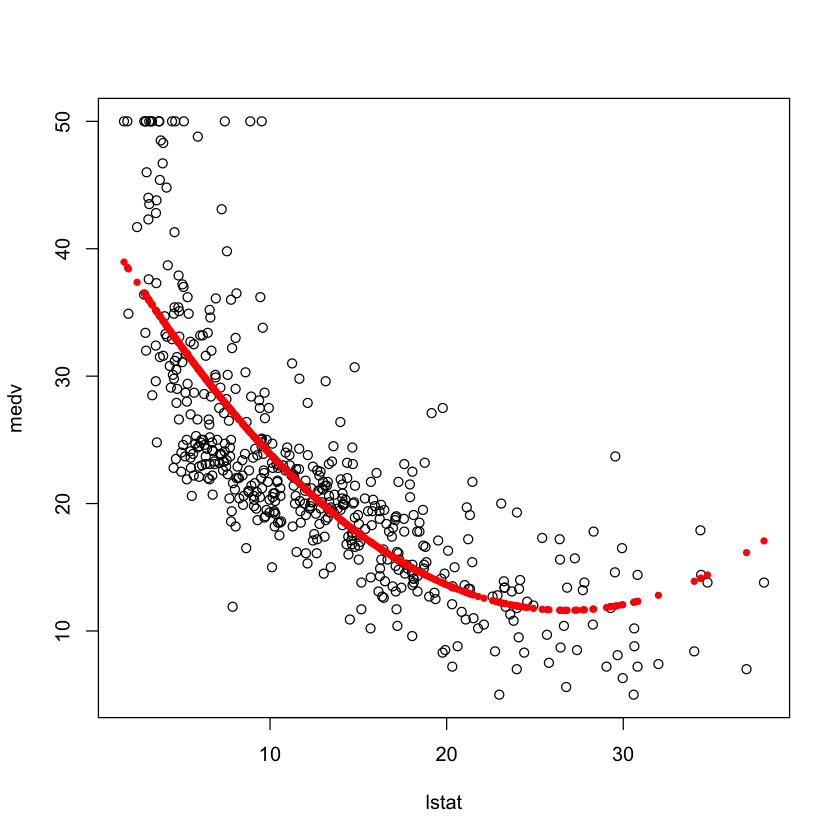

In [89]:
plot(medv~lstat, Boston)
#abline(fit6, col='blue') - abline only works when you have a straight line fit!- duh
# Points
# x,y values where x is the lstat values and y is the fitted value of the model for these lstat values
# pch is the plotting character
points(Boston$lstat, fitted(fit6), col='red', pch=20)

In [94]:
# Easier way of fitting polynomials - poly function
# poly(lstat, 4) - polynomial of degree 4 in lstat
fit7 = lm(medv~poly(lstat, 4), Boston)
summary(fit7)


Call:
lm(formula = medv ~ poly(lstat, 4), data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.563  -3.180  -0.632   2.283  27.181 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       22.5328     0.2347  95.995  < 2e-16 ***
poly(lstat, 4)1 -152.4595     5.2801 -28.874  < 2e-16 ***
poly(lstat, 4)2   64.2272     5.2801  12.164  < 2e-16 ***
poly(lstat, 4)3  -27.0511     5.2801  -5.123 4.29e-07 ***
poly(lstat, 4)4   25.4517     5.2801   4.820 1.90e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.28 on 501 degrees of freedom
Multiple R-squared:  0.673,	Adjusted R-squared:  0.6704 
F-statistic: 257.8 on 4 and 501 DF,  p-value: < 2.2e-16


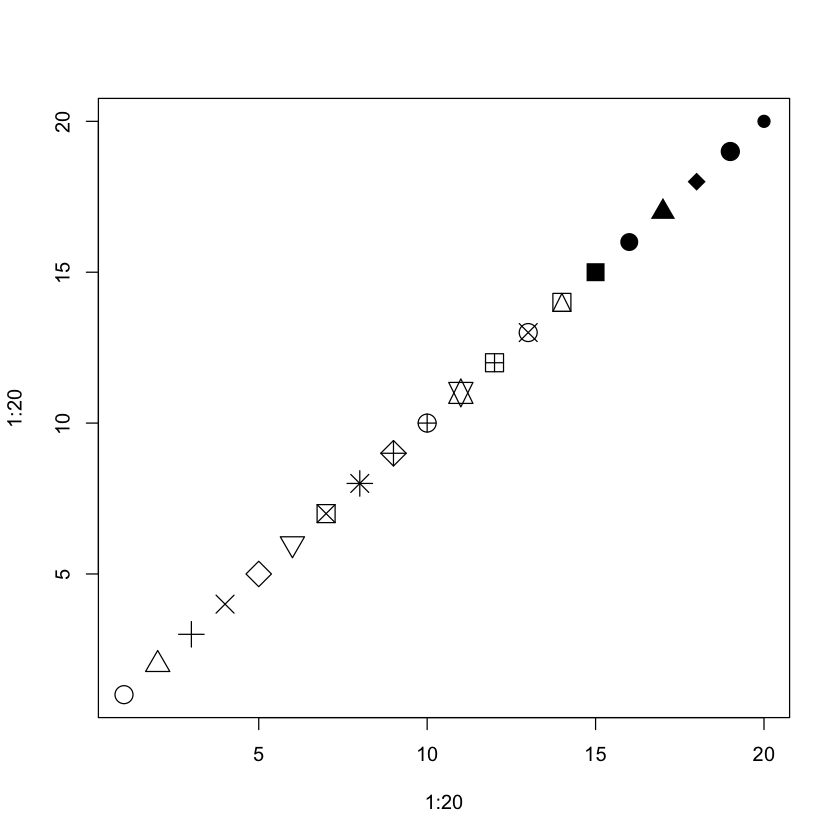

In [96]:
# Plotting characters available
# cex=2 : Enlarge the characters by 2
plot(1:20, 1:20, pch=1:20, cex=2)

# Qualitative Variables

In [98]:
head(Carseats)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.5,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.4,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
6,10.81,124,113,13,501,72,Bad,78,16,No,Yes


In [100]:
names(Carseats)

[1] "Sales"       "CompPrice"   "Income"      "Advertising" "Population" 
 [6] "Price"       "ShelveLoc"   "Age"         "Education"   "Urban"      
[11] "US"

In [101]:
summary(Carseats)

     Sales          CompPrice       Income        Advertising    
 Min.   : 0.000   Min.   : 77   Min.   : 21.00   Min.   : 0.000  
 1st Qu.: 5.390   1st Qu.:115   1st Qu.: 42.75   1st Qu.: 0.000  
 Median : 7.490   Median :125   Median : 69.00   Median : 5.000  
 Mean   : 7.496   Mean   :125   Mean   : 68.66   Mean   : 6.635  
 3rd Qu.: 9.320   3rd Qu.:135   3rd Qu.: 91.00   3rd Qu.:12.000  
 Max.   :16.270   Max.   :175   Max.   :120.00   Max.   :29.000  
   Population        Price        ShelveLoc        Age          Education   
 Min.   : 10.0   Min.   : 24.0   Bad   : 96   Min.   :25.00   Min.   :10.0  
 1st Qu.:139.0   1st Qu.:100.0   Good  : 85   1st Qu.:39.75   1st Qu.:12.0  
 Median :272.0   Median :117.0   Medium:219   Median :54.50   Median :14.0  
 Mean   :264.8   Mean   :115.8                Mean   :53.32   Mean   :13.9  
 3rd Qu.:398.5   3rd Qu.:131.0                3rd Qu.:66.00   3rd Qu.:16.0  
 Max.   :509.0   Max.   :191.0                Max.   :80.00   Max.   :18.0  

In [102]:
# Sales~. : Everything in the model except sales
lm(Sales~.+Income:Advertising+Age:Price, Carseats)


Call:
lm(formula = Sales ~ . + Income:Advertising + Age:Price, data = Carseats)

Coefficients:
       (Intercept)           CompPrice              Income         Advertising  
         6.5755654           0.0929371           0.0108940           0.0702462  
        Population               Price       ShelveLocGood     ShelveLocMedium  
         0.0001592          -0.1008064           4.8486762           1.9532620  
               Age           Education            UrbanYes               USYes  
        -0.0579466          -0.0208525           0.1401597          -0.1575571  
Income:Advertising           Price:Age  
         0.0007510           0.0001068  


In [103]:
# ShelveLoc is a Qualitative Variable
# contrasts function shows how R will code the qualitative variable when its put in a linear model
contrasts(Carseats$ShelveLoc)

,Good,Medium
Bad,0,0
Good,1,0
Medium,0,1


In [106]:
# Writing a function in R
regplot = function(x, y) {
    fit = lm(y~x)
    plot(x, y)
    abline(fit, col='red')
}

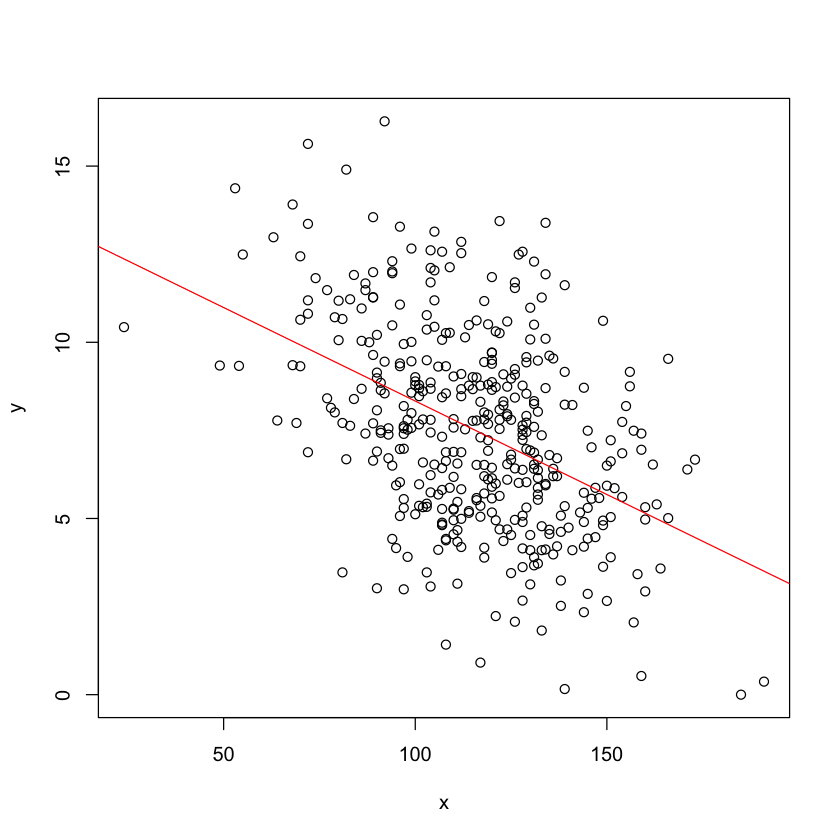

In [107]:
regplot(Carseats$Price, Carseats$Sales)

In [108]:
# varags
regplot = function(x, y, ...) {
    fit = lm(y~x)
    plot(x, y, ...)
    abline(fit, col='red')
}

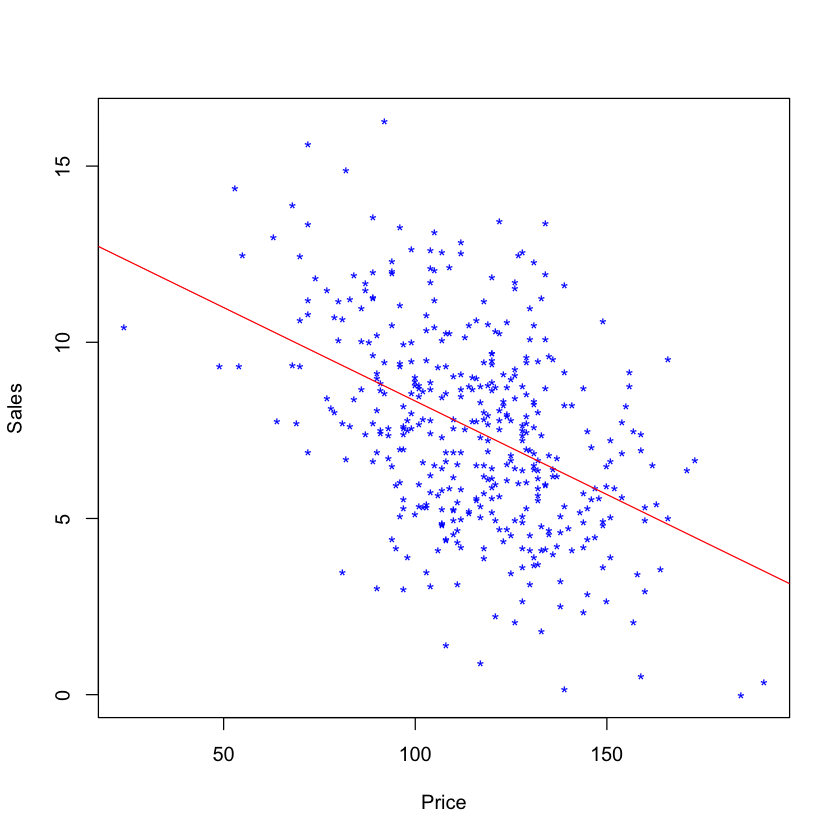

In [109]:
regplot(Carseats$Price, Carseats$Sales, xlab='Price', ylab='Sales', col='blue', pch='*')